# Task 2: Learning & Dynamics
Matrix games

Biased Rock-Paper-Scissors Game, Dispersion Game, Battle of the Sexes and Prisoners Dilemma

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pyspiel
from open_spiel.python import rl_environment
from open_spiel.python.algorithms import tabular_qlearner
from open_spiel.python.algorithms import projected_replicator_dynamics


Games definitions:

In [2]:
rock_paper_scissors_payoffs = np.array([[0,-0.25,0.5],
                                        [0.25,0,-0.05],
                                        [-0.5,0.05,0]])

rock_paper_scissors = pyspiel.create_matrix_game("rock_paper_scissors",
                           "Biased Rock-Paper-Scissors",
                           ["R", "P", "S"], ["R", "P", "S"],
                           rock_paper_scissors_payoffs,
                           rock_paper_scissors_payoffs.T)
                           

Setting up rl environment and agents:

In [3]:
num_players = 2
env = rl_environment.Environment(rock_paper_scissors)
num_actions = env.action_spec()["num_actions"]
agents = [
  tabular_qlearner.QLearner(player_id=idx, num_actions=num_actions)
  for idx in range(num_players)
]


Training agents:

In [4]:
rewards = []
training_episodes = 1000
for cur_episode in range(training_episodes):
    time_step = env.reset()
    while not time_step.last():
        actions = [
                agent.step(time_step).action
                for agent in agents
            ]
        time_step = env.step(actions)
    # Episode is over, step all agents with final info state.
    for agent in agents:
        agent.step(time_step)
    rewards.append(time_step.rewards)

print("training completed after", training_episodes, "episodes")

training completed after 1000 episodes


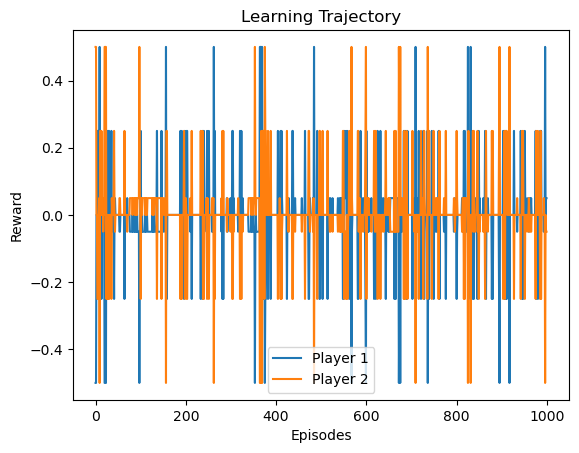

In [5]:
plt.plot(range(training_episodes), rewards, )
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Learning Trajectory')
plt.legend(["Player 1","Player 2"])

In [10]:
def test_two_players():
    prisoners_dilemma_payoffs_1 = np.array([[-1,-4],
                                            [0,-3]])
    prisoners_dilemma_payoffs_2 = np.array([[-1,0],
                                            [-4,-3]])

    strategies = projected_replicator_dynamics.projected_replicator_dynamics(
        [prisoners_dilemma_payoffs_1, prisoners_dilemma_payoffs_2],
        prd_initial_strategies=None,
        prd_iterations=100,
        prd_dt=1e-3,
        prd_gamma=1e-8,
        average_over_last_n_strategies=10)
    
    return strategies
    

strategies = test_two_players()
print(strategies)

[[0.47614289 0.52385711]
 [0.47614289 0.52385711]]
